[![Troy Tompkins](https://github.com/ttompk/musings/blob/master/images/t-dist.png?raw=true "Troy's Github")](https://github.com/ttompk/als) ![Troy](https://github.com/ttompk/musings/blob/master/images/name.png?raw=true)

# Fastai Template for Multilabel Classification
---

[Today's Date]  
Written in python: 3.6.8

In [1]:
from platform import python_version
print('Your python version: {}'.format(python_version()))

Your python version: 3.6.8


## Notebook TOC
---
1. Overview
2. Libraries
3. Generalized Functions
4. Data ETL
5. Analysis
6. Conclussion
7. Next Steps

## 1. Overview
---
This notebook was developed for image detection using the Fastai library.

### Directive/Objective
The instructions were provided in ...  

**Part 1**  
This

**Part 2**  
That


### Data Source
The orginal data consisted of ...   



## 2. Libraries
---

In [1]:
# basic kit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os
import pandas_profiling
import re
import collections

In [2]:
from fastai.vision import *


In [3]:
%load_ext autoreload
%autoreload 2

## 3. Generalized Functions
---

## 4. Data
---

#### 4.1. Data ETL

In [4]:
# Dataset is the MNIST digital number images
planet = untar_data(URLs.PLANET_TINY)
planet_tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

#### 4.2 Define data object

In [5]:
data = (ImageList.from_csv(planet, 'labels.csv', folder='train', suffix='.jpg')
        .split_by_rand_pct()
        .label_from_df(label_delim=' ')
        .transform(planet_tfms, size=128)
        .databunch()
        .normalize(imagenet_stats))

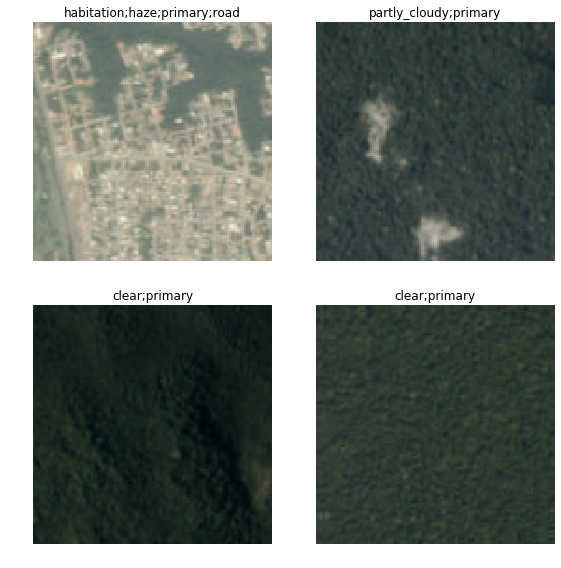

In [6]:
data.show_batch(rows=2, figsize=(8,8))

## 5. Training
---

#### **5.1. Model**

In [7]:
# simple CNN
#model = simple_cnn((3,16,16,2))    # syn
model = models.resnet18    # use cnn_learner for pretrained models.

#### **5.2. Learner**

The *cnn_learner* factory method helps you to automatically get a pretrained model from a given architecture with a custom head that is suitable for your data. Cuts the pretrained model after the last conv layer and adds: 
1. an AdaptiveConcatPool2d layer,
2. a Flatten layer,
3. blocks of *[nn.BatchNorm1d, nn.Dropout, nn.Linear, nn.ReLU]* layers.

The backbone is frozen and trains after the last pretrained conv layer if 'pretrained = True (default).

**cnn_learner**(data:DataBunch, base_arch:Callable, cut:Union[int, Callable]=None, pretrained:bool=True, lin_ftrs:Optional[Collection[int]]=None, ps:Floats=0.5, custom_head:Optional[Module]=None, split_on:Union[Callable, Collection[ModuleList], NoneType]=None, bn_final:bool=False, init='kaiming_normal_', concat_pool:bool=True, **kwargs:Any) 

In [8]:
#learn = Learner(data, model)
learn = cnn_learner(data=data, base_arch=model)

#### 5.2.1. Learning Rate Finder

lr_find(learn:Learner, start_lr:Floats=1e-07, end_lr:Floats=10, num_it:int=100, stop_div:bool=True, wd:float=None)

In [11]:
# run learning rate finder
learn.lr_find()

Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/Applications/anaconda3/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Applications/anaconda3/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/Applications/anaconda3/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/Applications/anaconda3/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Applications/anaconda3/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
   

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 

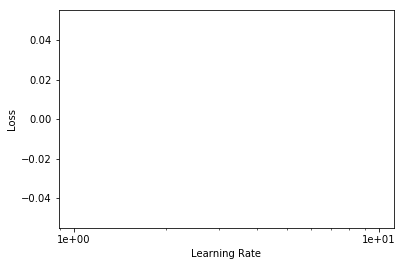

In [10]:
# plot the finder results
learn.recorder.plot()

#### **5.3. Metrics**

In [16]:
# Metrics
# metrics always calculated on the validation set
#learn.metrics=[accuracy]    # accuracy does not work on multilabel classification

#### **5.4. Callbacks**

In [17]:
# Callbacks to modify training
#cb = OneCycleScheduler(learn, lr_max=0.01)   # this funciton not working


#### **5.5. Fit**



**fit_one_cycle**(learn:Learner, cyc_len:int, max_lr:Union[float, Collection[float], slice]=slice(None, 0.003, None), moms:Point=(0.95, 0.85), div_factor:float=25.0, pct_start:float=0.3, final_div:float=None, wd:float=None, callbacks:Optional[Collection[Callback]]=None, tot_epochs:int=None, start_epoch:int=None)

In [18]:
n_epochs = 5
#learn.fit(n_epochs, callbacks=cb)
learn.fit_one_cycle(n_epochs,1e-2)
learn.save('mini_train')

epoch,train_loss,valid_loss,time
0,0.807716,0.740114,00:51
1,0.781486,0.743078,00:58
2,0.735408,0.664191,00:56
3,0.685223,0.559738,00:57
4,0.645160,0.511363,00:59


#### 6. Show Results
---

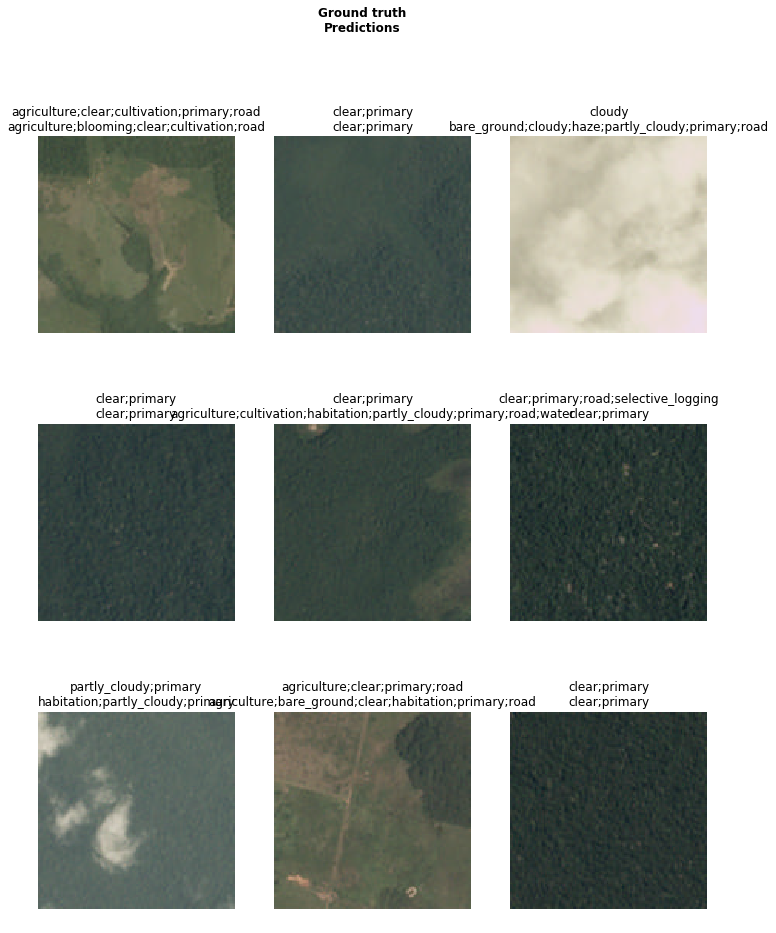

In [19]:
#learn.show_results()
learn.show_results(rows=3, figsize=(12,15))

## 7. Predictions
---

#### Class Prediction

predict(item:ItemBase, return_x:bool=False, batch_first:bool=True, with_dropout:bool=False, **kwargs)

In [ ]:
test = learn.data.train_ds[0][0]   # grab one example from training set
pred = learn.predict(test)

#### Prediciton Probabilities

get_preds(ds_type:DatasetType=<DatasetType.Valid: 2>, activ:Module=None, with_loss:bool=False, n_batch:Optional[int]=None, pbar:Union[MasterBar, ProgressBar, NoneType]=None) → List[Tensor]